In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zeotape/Products.csv
/kaggle/input/zeotape/Customers.csv
/kaggle/input/zeotape/Transactions.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data load

In [3]:
customers = pd.read_csv("/kaggle/input/zeotape/Customers.csv")
products = pd.read_csv("/kaggle/input/zeotape/Products.csv")
transactions = pd.read_csv("/kaggle/input/zeotape/Transactions.csv")

In [4]:
print("Customers")
display(customers.head())
print("Products")
display(products.head())
print("Transactions")
display(transactions.head())

Customers


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


Products


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


Transactions


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 7:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


# Data Shape

In [5]:
print("Customer", customers.shape)
print("products",products.shape)
print("transactions",transactions.shape)

Customer (200, 4)
products (100, 4)
transactions (1000, 7)


# Dataframe datatypes

In [6]:
print("Basic Description")
print("Customers")
print(customers.dtypes)
print("Products")
display(products.dtypes)
print("Transactions")
display(transactions.dtypes)

customers["SignupDate"]=pd.to_datetime(customers["SignupDate"])
transactions["TransactionDate"]=pd.to_datetime(transactions["TransactionDate"])

Basic Description
Customers
CustomerID      object
CustomerName    object
Region          object
SignupDate      object
dtype: object
Products


ProductID       object
ProductName     object
Category        object
Price          float64
dtype: object

Transactions


TransactionID       object
CustomerID          object
ProductID           object
TransactionDate     object
Quantity             int64
TotalValue         float64
Price              float64
dtype: object

# Description

In [7]:
print("Basic Description")
print("Customers")
display(customers.describe())
display(products.describe(include="object"))
print("Products")
display(products.describe())
display(products.describe(include="object"))
print("Transactions")
display(transactions.describe())
display(transactions.describe(include="object"))

Basic Description
Customers


,SignupDate
count,200
mean,2023-07-19 08:31:12
min,2022-01-22 00:00:00
25%,2022-09-26 12:00:00
50%,2023-08-31 12:00:00
75%,2024-04-12 12:00:00
max,2024-12-28 00:00:00


,ProductID,ProductName,Category
count,100,100,100
unique,100,66,4
top,P001,ActiveWear Smartwatch,Books
freq,1,4,26


Products


,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


,ProductID,ProductName,Category
count,100,100,100
unique,100,66,4
top,P001,ActiveWear Smartwatch,Books
freq,1,4,26


Transactions


,TransactionDate,Quantity,TotalValue,Price
count,1000,1000.000000,1000.000000,1000.00000
mean,2024-06-23 15:33:02.768999936,2.537000,689.995560,272.55407
min,2023-12-30 15:29:12,1.000000,16.080000,16.08000
25%,2024-03-25 22:05:34.500000,2.000000,295.295000,147.95000
50%,2024-06-26 17:21:52.500000,3.000000,588.880000,299.93000
75%,2024-09-19 14:19:57,4.000000,1011.660000,404.40000
max,2024-12-28 11:00:00,4.000000,1991.040000,497.76000
std,NaN,1.117981,493.144478,140.73639


,TransactionID,CustomerID,ProductID
count,1000,1000,1000
unique,1000,199,100
top,T00001,C0109,P059
freq,1,11,19


In [8]:
print("Missing values")
print("Customers")
print(customers.isnull().sum())
print("Products")
print(products.isnull().sum())
print("Transactions")
print(transactions.isnull().sum())
# No null values

Missing values
Customers
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Products
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Transactions
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [9]:
print("Duplicate Customers:", customers.duplicated().sum())
print("Duplicate Products:", products.duplicated().sum())
print("Duplicate Transactions:", transactions.duplicated().sum())
# No duplicates

Duplicate Customers: 0
Duplicate Products: 0
Duplicate Transactions: 0


# Data Combination

In [10]:
df_combined_trans_cust=transactions.merge(customers,on="CustomerID",how="left")
df_combined=df_combined_trans_cust.merge(products.drop(["Price"],axis=1),on="ProductID",how="left")
df_combined.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,ProductName,Category
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics


# Top N Frequent Customers

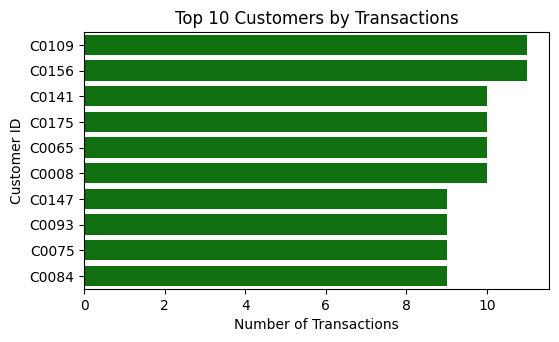

In [11]:
top_n_cnt=10
top_customers=df_combined["CustomerID"].value_counts().head(top_n_cnt)
plt.figure(figsize=(6,top_n_cnt/3))
sns.barplot(y=top_customers.index,x=top_customers.values,color="green")
plt.ylabel("Customer ID")
plt.xlabel("Number of Transactions")
plt.title(f"Top {top_n_cnt} Customers by Transactions")
plt.show()

# Best and Worst Seller Products

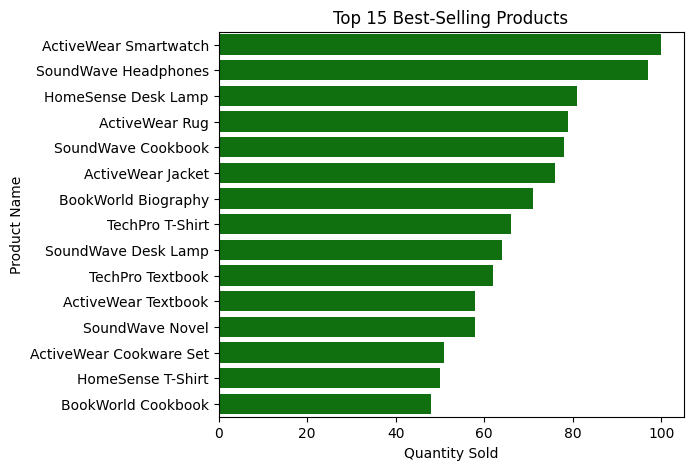

In [12]:
top_n_cnt=15
top_products=df_combined.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False)
top_n_products=top_products.head(top_n_cnt)
plt.figure(figsize=(6,top_n_cnt/3))
sns.barplot(x=top_n_products.values,y=top_n_products.index,color="green")
plt.xlabel("Quantity Sold")
plt.ylabel("Product Name")
plt.title(f"Top {top_n_cnt} Best-Selling Products")
plt.show()

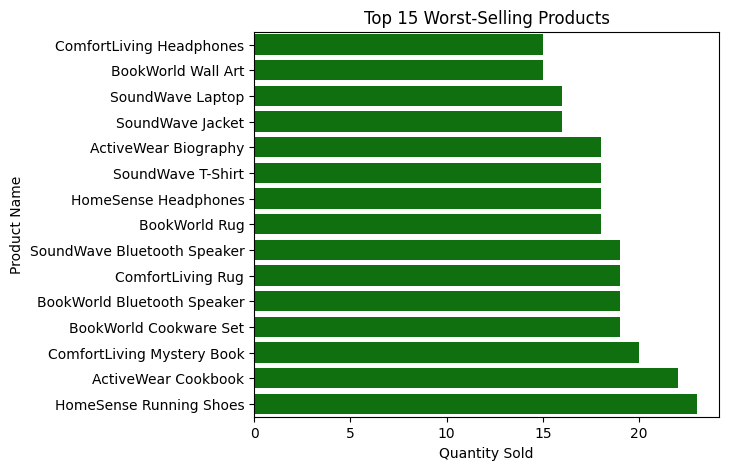

In [13]:
bottom_n_cnt=15
least_sodl_products=df_combined.groupby("ProductName")["Quantity"].sum().sort_values(ascending=True)
least_sodl_products=least_sodl_products.head(bottom_n_cnt)
plt.figure(figsize=(6,top_n_cnt/3))
sns.barplot(x=least_sodl_products.values,y=least_sodl_products.index,color="green")
plt.xlabel("Quantity Sold")
plt.ylabel("Product Name")
plt.title(f"Top {bottom_n_cnt} Worst-Selling Products")
plt.show()

# Category revenue

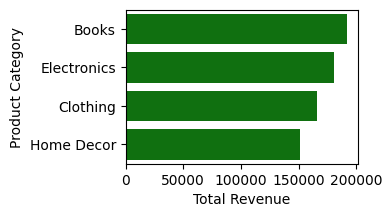

In [14]:
category_revenue = df_combined.groupby("Category")["TotalValue"].sum().sort_values(ascending=False)
plt.figure(figsize=(3, 2))
sns.barplot(y=category_revenue.index,x=category_revenue.values,color="green")
plt.ylabel("Product Category")
plt.xlabel("Total Revenue")
plt.show()

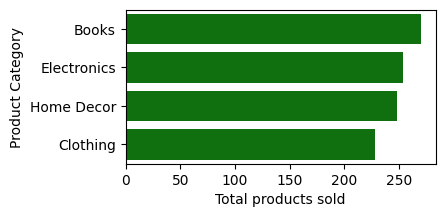

In [15]:
category_transactions = df_combined.groupby("Category")["TotalValue"].count().sort_values(ascending=False)
plt.figure(figsize=(4, 2))
sns.barplot(y=category_transactions.index,x=category_transactions.values,color="green")
plt.ylabel("Product Category")
plt.xlabel("Total products sold")
plt.show()

# Monthly sales

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


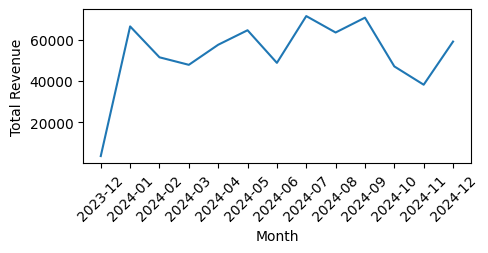

In [16]:
df_combined["Month"]=df_combined["TransactionDate"].dt.to_period("M")
monthly_sales=df_combined.groupby("Month")["TotalValue"].sum()
monthly_sales
plt.figure(figsize=(5,2))
sns.lineplot(x=monthly_sales.index.astype(str),y=monthly_sales.values)
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.show()

# Regional Sales

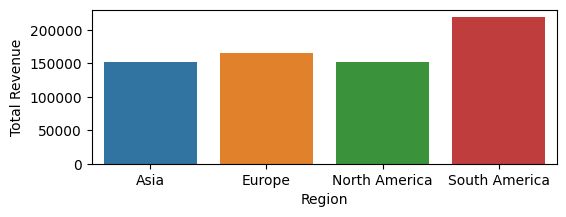

In [17]:
regional_sales=df_combined.groupby("Region")["TotalValue"].sum()
plt.figure(figsize=(6,2))
sns.barplot(x=regional_sales.index, y=regional_sales.values)
plt.xlabel("Region")
plt.ylabel("Total Revenue")
plt.show()

# Average order value

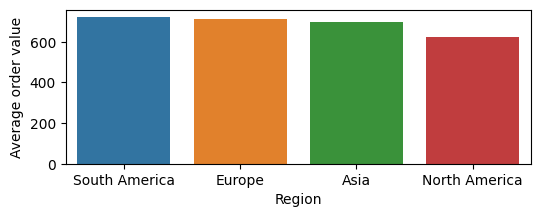

In [18]:
AOV_region = df_combined.groupby("Region")["TotalValue"].mean().sort_values(ascending=False)
plt.figure(figsize=(6,2))
sns.barplot(x=AOV_region.index, y=AOV_region.values)
plt.xlabel("Region")
plt.ylabel("Average order value")
plt.show()

# Price Distribution of Products

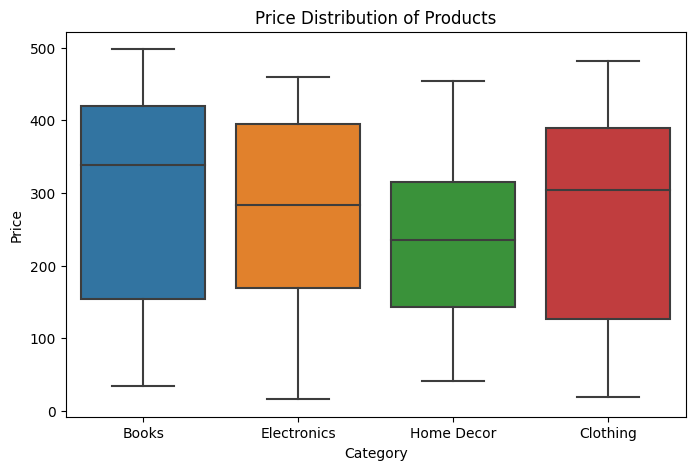

In [19]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=products["Price"],x=products["Category"])
plt.ylabel("Price")
plt.title("Price Distribution of Products")
plt.show()

# Important customers

In [20]:
top_10_customers_revenue=df_combined.groupby("CustomerID")["TotalValue"].sum().nlargest(10)
print("Top 10 Customers by Revenue:")
print(top_10_customers_revenue)

Top 10 Customers by Revenue:
CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64


In [21]:
print("Products with Unusual Prices:")
print("On lower side")
display(products[products["Price"] < products["Price"].quantile(0.05)])
print("On higher side")
display(products[products["Price"] > products["Price"].quantile(0.95)])

Products with Unusual Prices:
On lower side


,ProductID,ProductName,Category,Price
13,P014,ActiveWear Jacket,Clothing,26.26
34,P035,ActiveWear T-Shirt,Clothing,30.59
43,P044,ActiveWear Running Shoes,Clothing,18.82
55,P056,SoundWave Smartwatch,Electronics,16.08
72,P073,ComfortLiving Laptop,Electronics,26.99


On higher side


,ProductID,ProductName,Category,Price
16,P017,ActiveWear Textbook,Books,469.77
31,P032,BookWorld Cookbook,Books,488.63
36,P037,SoundWave Smartwatch,Electronics,459.86
44,P045,SoundWave T-Shirt,Clothing,481.78
74,P075,TechPro Textbook,Books,497.76


In [22]:
import datetime
current_date = df_combined["TransactionDate"].max()
rfm = df_combined.groupby("CustomerID").agg({
    "TransactionDate":lambda x:(current_date-x.max()).days, 
    "CustomerID":"count",  
    "Price":"sum"
})
rfm.columns=["Recency", "Frequency","Moneaatary"]
(rfm.describe())


,Recency,Frequency,Moneaatary
count,199.000000,199.000000,199.000000
mean,73.889447,5.025126,1369.618442
std,70.943268,2.198340,663.369301
min,0.000000,1.000000,41.180000
25%,17.000000,3.000000,895.375000
50%,59.000000,5.000000,1301.100000
75%,104.000000,6.000000,1810.280000
max,360.000000,11.000000,3857.060000


In [23]:
print(df_combined["ProductName"].unique())

['ComfortLiving Bluetooth Speaker' 'HomeSense T-Shirt'
 'ActiveWear Smartphone' 'TechPro Textbook' 'TechPro Running Shoes'
 'TechPro Rug' 'ActiveWear Cookware Set' 'BookWorld Biography'
 'BookWorld Cookware Set' 'HomeSense Novel' 'ComfortLiving Smartphone'
 'SoundWave Cookbook' 'ComfortLiving Smartwatch' 'SoundWave Mystery Book'
 'TechPro Vase' 'HomeSense Desk Lamp' 'ActiveWear Wall Art'
 'ComfortLiving Biography' 'ComfortLiving Desk Lamp' 'SoundWave Novel'
 'ComfortLiving Cookware Set' 'TechPro Novel' 'BookWorld Running Shoes'
 'ActiveWear Jeans' 'BookWorld Jacket' 'BookWorld Smartwatch'
 'ActiveWear Textbook' 'ActiveWear Smartwatch' 'ActiveWear Cookbook'
 'SoundWave Headphones' 'HomeSense Rug' 'HomeSense Sweater'
 'TechPro Smartwatch' 'ActiveWear Running Shoes' 'HomeSense Wall Art'
 'SoundWave Rug' 'ActiveWear Headphones' 'SoundWave Jeans'
 'SoundWave Desk Lamp' 'BookWorld Cookbook' 'BookWorld Wall Art'
 'TechPro Cookbook' 'SoundWave Jacket' 'BookWorld Sweater'
 'HomeSense Bluetooth 

In [24]:
df_combined["CompanyName"]=df_combined["ProductName"].str.split().str[0]
df_combined["ProductType"]=df_combined["ProductName"].str.split().str[1:].str.join(" ")
print(df_combined["CompanyName"].value_counts())

CompanyName
ActiveWear       231
SoundWave        210
TechPro          156
HomeSense        152
BookWorld        132
ComfortLiving    119
Name: count, dtype: int64


# Most Common Products

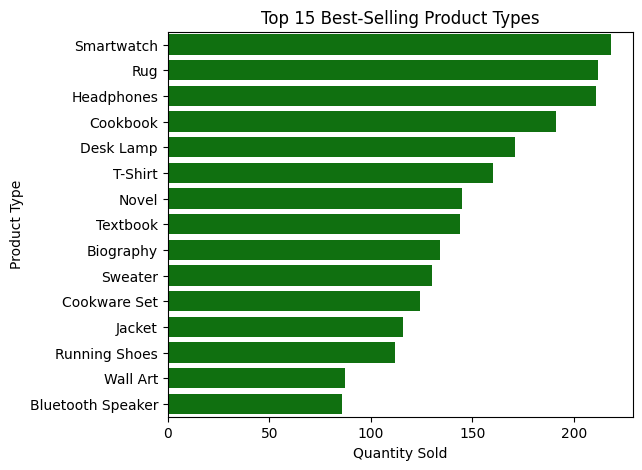

In [25]:
top_n_cnt=15
top_product_types= df_combined.groupby("ProductType")["Quantity"].sum().sort_values(ascending=False).head(top_n_cnt)
plt.figure(figsize=(6,top_n_cnt / 3))
sns.barplot(x=top_product_types.values,y=top_product_types.index,color="green")
plt.xlabel("Quantity Sold")
plt.ylabel("Product Type")
plt.title(f"Top {top_n_cnt} Best-Selling Product Types")
plt.show()

# Get top-selling Companies

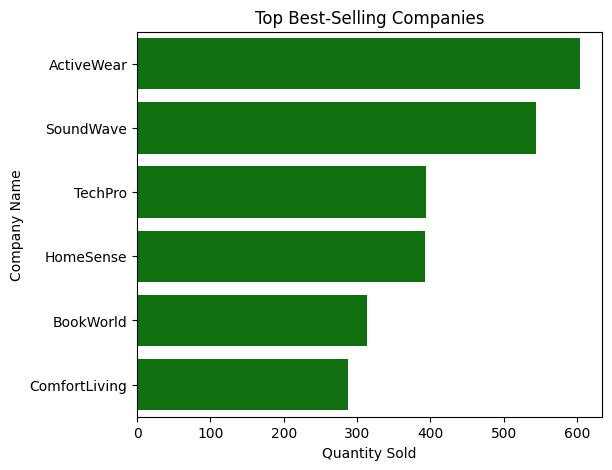

In [26]:
top_companies = df_combined.groupby("CompanyName")["Quantity"].sum().sort_values(ascending=False)
plt.figure(figsize=(6,top_n_cnt/3))
sns.barplot(x=top_companies.values,y=top_companies.index,color="green")
plt.xlabel("Quantity Sold")
plt.ylabel("Company Name")
plt.title(f"Top Best-Selling Companies")
plt.show()

# Company wise Category

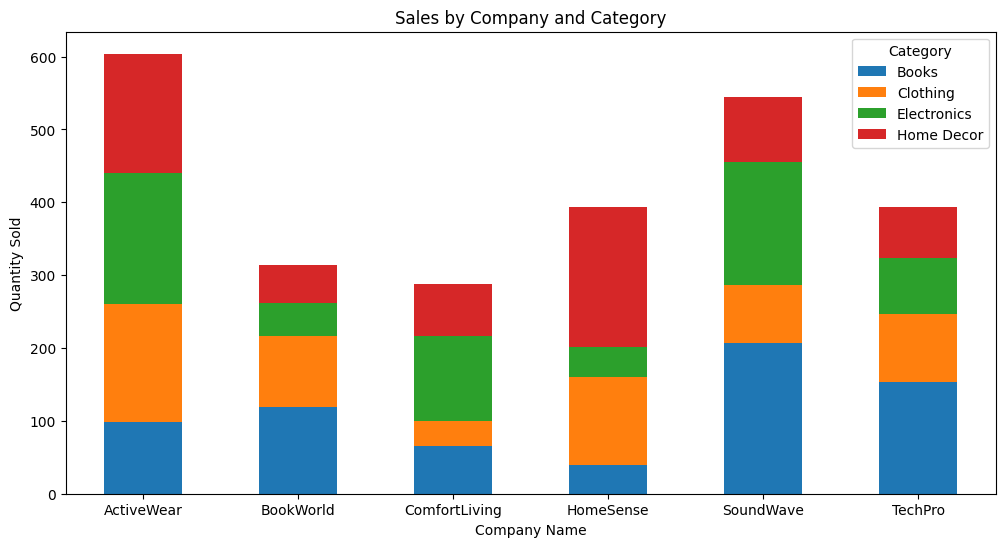

In [27]:
company_category_sales = df_combined.groupby(["CompanyName", "Category"])["Quantity"].sum().unstack()
company_category_sales.plot(kind="bar",stacked=True, figsize=(12, 6))
plt.xlabel("Company Name")
plt.ylabel("Quantity Sold")
plt.title("Sales by Company and Category")
plt.legend(title="Category")
plt.xticks(rotation=0)
plt.show()
